# Classification(iris data with KNeighborsClassifier)

In [1]:
import warnings

# Avoid unnecessary warning output.
warnings.filterwarnings('ignore')

In [58]:
import pandas as pd
import seaborn as sns
from IPython.display import Image

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
data = iris['data']
feature_names = iris['feature_names']
target = iris['target']
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Make DataFrame

In [6]:
df_iris = pd.DataFrame(data, columns=feature_names)

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df_iris['target'] = target

In [9]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify = df_iris['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

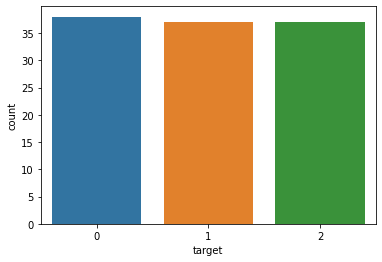

In [12]:
sns.countplot(y_train)

In [13]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [14]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

In [15]:
from IPython.display import Image

### KNeighborsClassifier

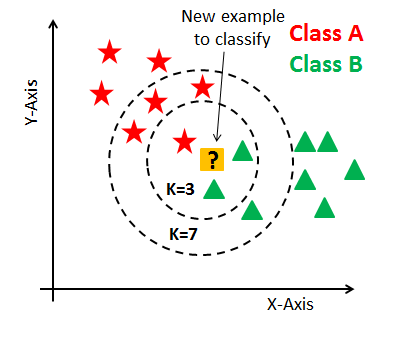

In [16]:
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png')

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knc = KNeighborsClassifier()

In [26]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
knc_pred = knc.predict(x_valid)

In [28]:
(knc_pred == y_valid).mean()

0.9736842105263158

In [29]:
knc = KNeighborsClassifier(n_neighbors=9)
knc.fit(x_train, y_train)
knc_pred = knc.predict(x_valid)

In [30]:
(knc_pred == y_valid).mean()

1.0

# SVC

* Create a non-stochastic binary linear classification model that determines which category new data belongs to.
* Algorithm to find the boundary with the largest width among data expressed as boundaries.

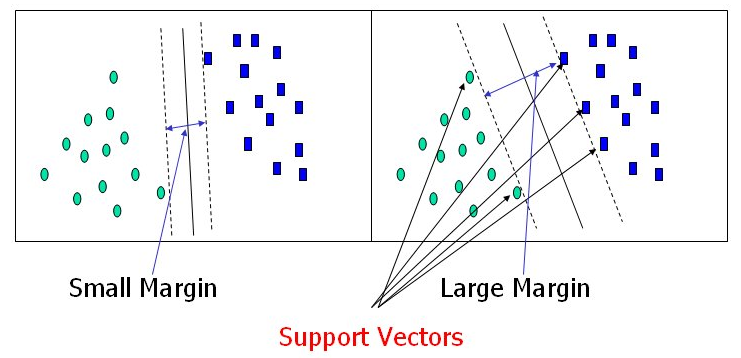

In [31]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png')

Only binary classification is possible, like LogisticRegression. (Only two classes can be discriminated.)

- Use of OvsR strategy

[document](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [32]:
from sklearn.svm import SVC

In [36]:
svc = SVC(random_state = 0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [37]:
svc

SVC(random_state=0)

In [38]:
(svc_pred == y_valid).mean()

1.0

In [39]:
svc_pred[:5]

array([2, 0, 1, 0, 1])

`decision_function()` that returns the probability value for each class

In [40]:
svc.decision_function(x_valid)[:5]

array([[-0.23303451,  0.93162872,  2.240261  ],
       [ 2.23208462,  1.15637443, -0.25351021],
       [-0.23277667,  2.21638146,  1.1057563 ],
       [ 2.23200834,  1.1519243 , -0.25256858],
       [-0.23854618,  2.2012744 ,  1.16604144]])

# Decision Tree

[document](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtc = DecisionTreeClassifier(random_state = 0)

In [63]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
dtc_pred = dtc.predict(x_valid)

In [65]:
(dtc_pred == y_valid).mean()

0.9736842105263158

## Visualization of decision tree

In [66]:
from sklearn.tree import export_graphviz
from subprocess import call

In [67]:
def graph_tree(model):
    
    # Export to .dot file
    export_graphviz(model, out_file='tree.dot')

    # Convert the generated .dot file to .png
    call(['dot', '-Tpng', 'tree.dot', '-o', 'decistion-tree.png', '-Gdpi=600'])

    # .png output
    return Image(filename = 'decistion-tree.png', width=500)

gini coefficient: means impurity, and the higher the coefficient, the greater the entropy.

High entropy simply means that the classes are cluttered

In [ ]:
dtc = DecisionTreeClassifier(max_depth = 2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)

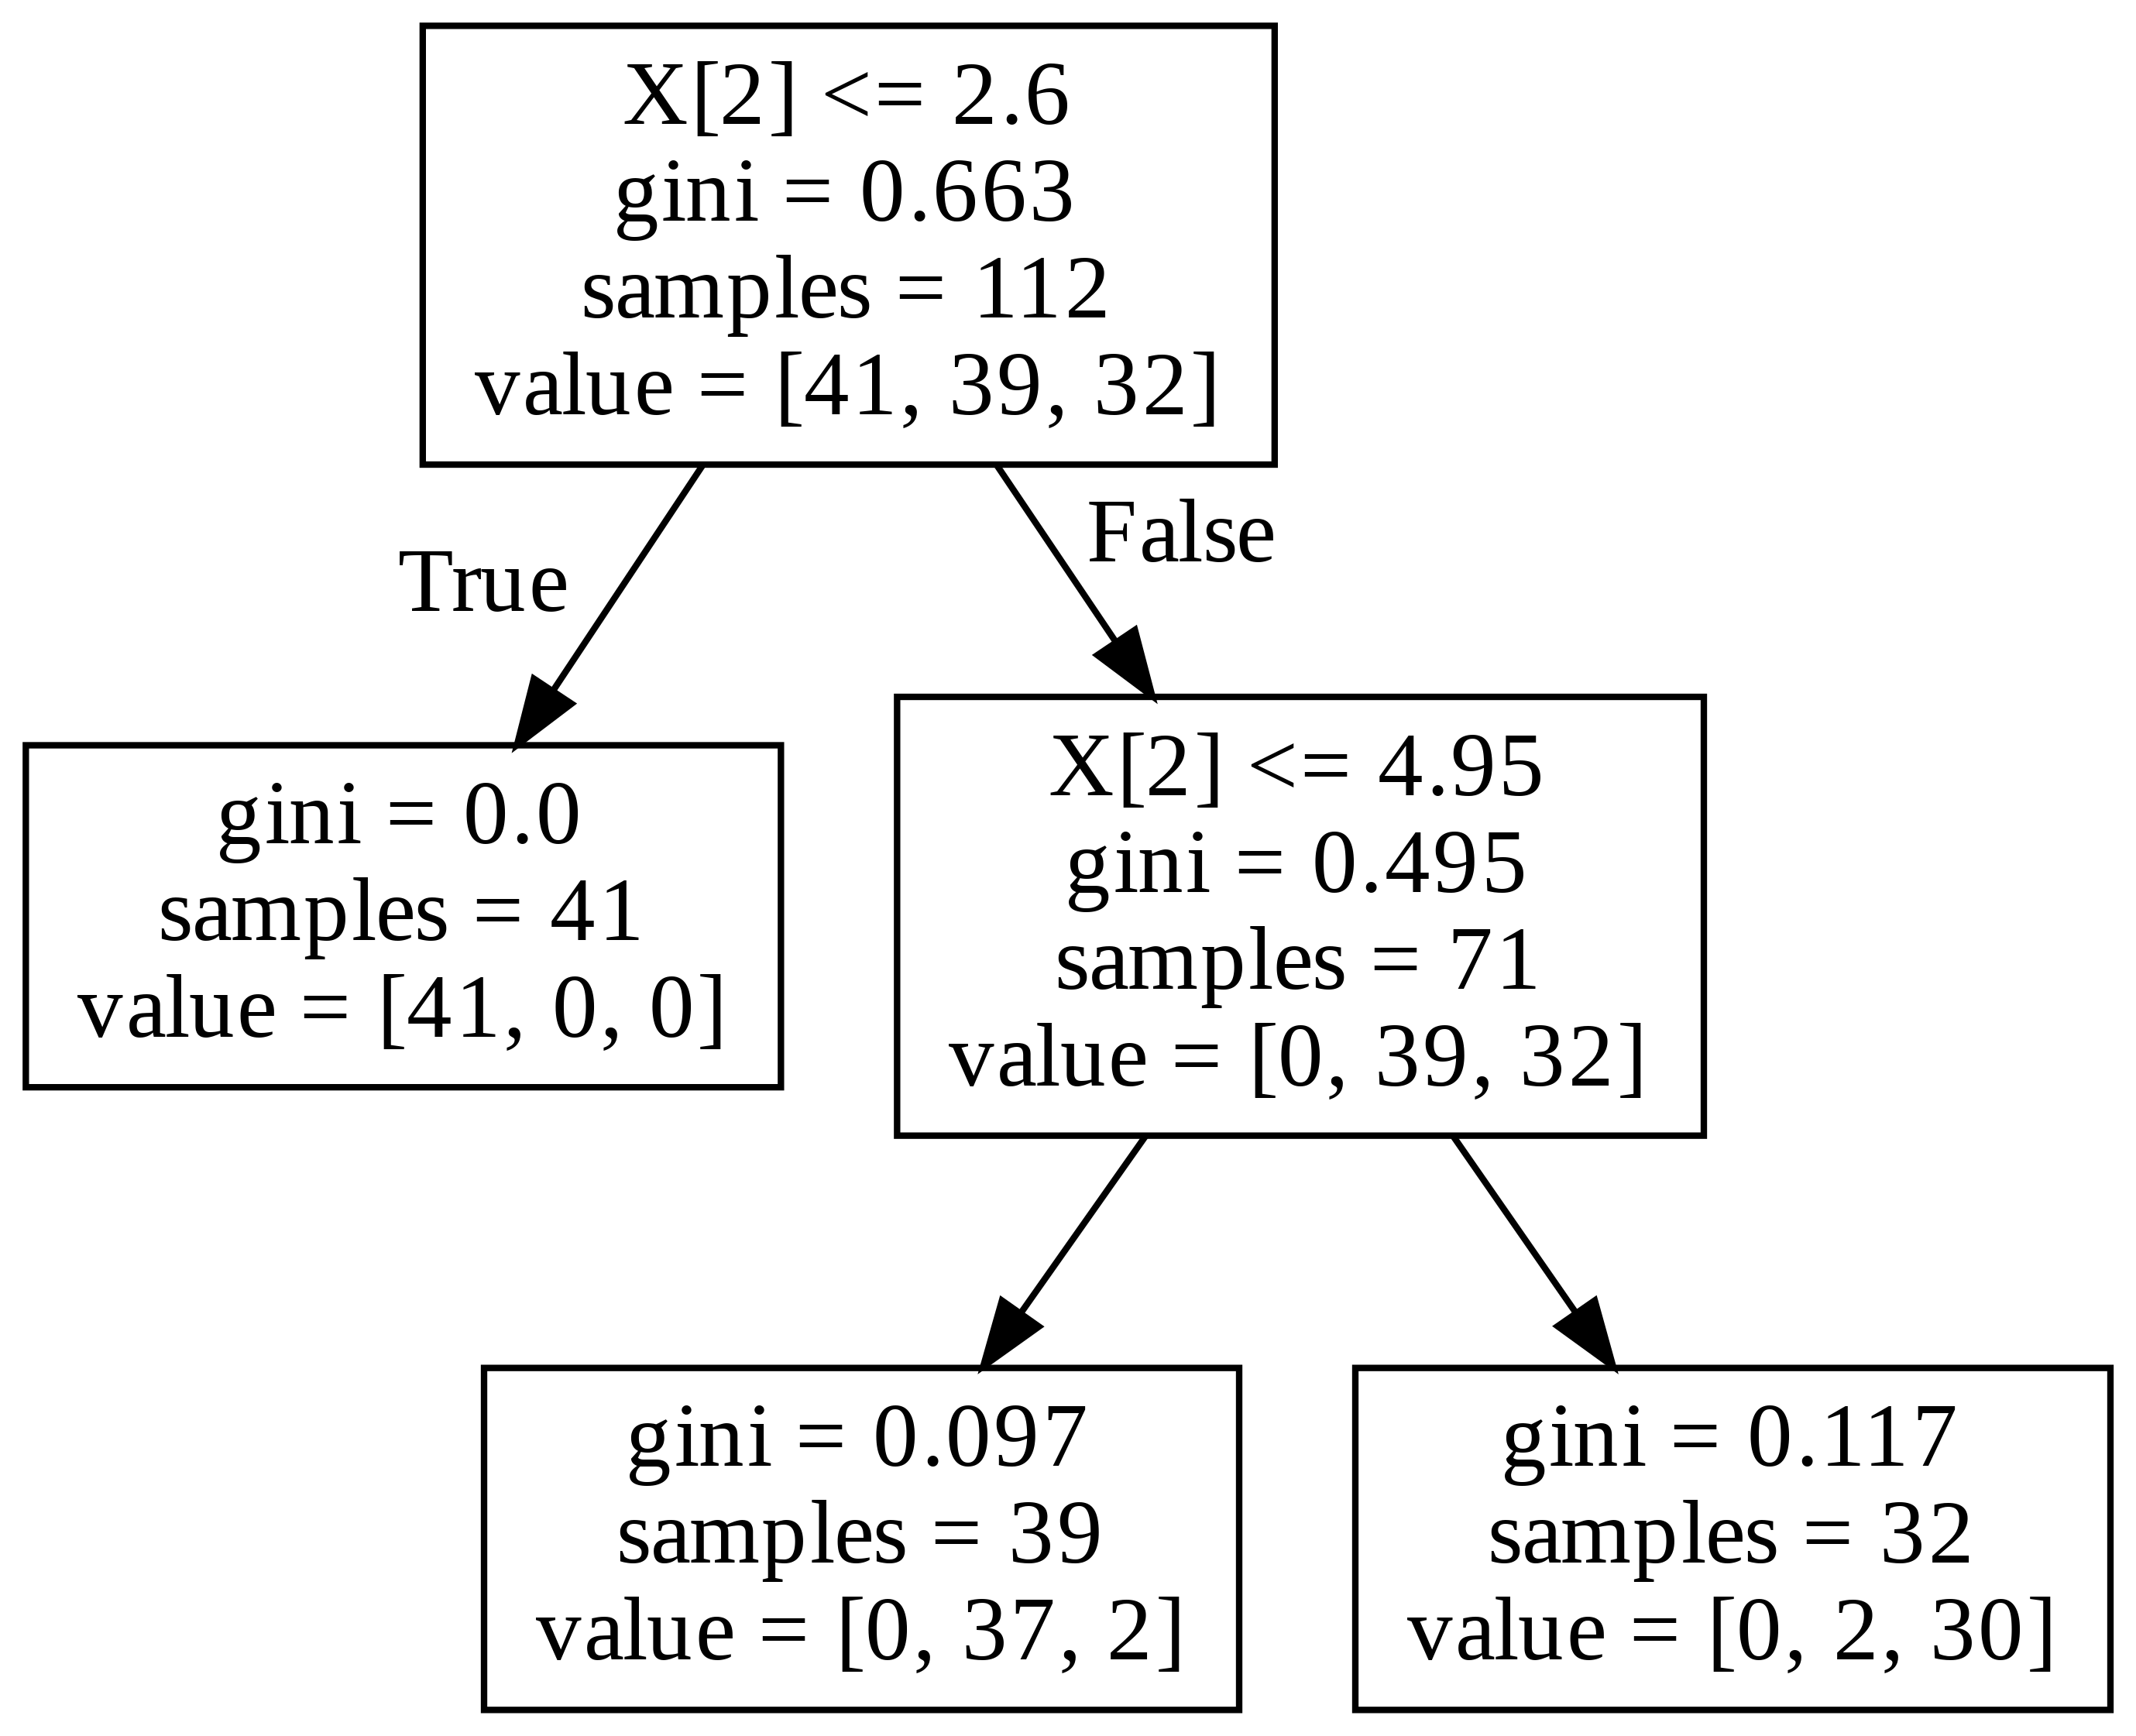

In [ ]:
graph_tree(dtc)